## 1 算法介绍

&nbsp;&nbsp;&nbsp;&nbsp;K-means 是一种简单且广泛使用的聚类算法，其目的是将数据集中的样本划分为 K 个聚类，使得每个样本都属于最近的均值（即聚类中心）所代表的聚类。该算法的目标是最小化所有样本到其聚类中心的距离平方和，这也被称为惯性（inertia）。

## 2 算法原理

K-means 算法涉及两个主要的公式或步骤：

1. **聚类中心的更新**：对于每个聚类 $C_i$，聚类中心 $\mu_i$ 通过计算该聚类中所有点的平均值来更新：
   $$
   \mu_i = \frac{1}{|C_i|} \sum_{x \in C_i} x
   $$
   其中，$C_i$ 是第 $i$ 个聚类中的点集，$|C_i|$ 是聚类 $C_i$ 中的点的数量。

2. **样本到聚类中心的距离**：样本 $x$ 到聚类中心 $\mu_i$ 的距离通常使用欧氏距离来计算：
   $$
   d(x, \mu_i) = \sqrt{\sum_{j=1}^n (x_j - \mu_{ij})^2}
   $$
   其中，$x_j$ 是样本 $x$ 的第 $j$ 个特征，$\mu_{ij}$ 是聚类中心 $\mu_i$ 的第 $j$ 个特征。

&nbsp;&nbsp;&nbsp;&nbsp;K-means 算法基于的距离度量是欧氏距离，其推导基于最小化每个点到其聚类中心的距离平方和。这个目标函数是凸的，因此使用梯度下降法可以找到全局最优解。

目标函数（惯性）为：
$$
J(\mu_1, \mu_2, \ldots, \mu_k) = \sum_{i=1}^k \sum_{x \in C_i} \sum_{j=1}^n (x_j - \mu_{ij})^2
$$
为了最小化 $J$，我们需要对每个聚类中心 $\mu_i$ 进行优化，这通常通过迭代更新聚类中心的位置来实现，直到收敛。

## 3 案例实现

以下是使用 Python 的 `scikit-learn` 库实现 K-means 聚类的简单示例：

- 我们首先生成了一些模拟数据，然后使用 KMeans 类创建了一个 K-means 模型，并指定了聚类的数量 `n_clusters`。

- 接着，我们用 `fit` 方法训练模型，并使用 `cluster_centers_` 和 `labels_` 属性获取聚类中心和每个样本的聚类标签。

- 最后，我们使用 `matplotlib` 库来可视化聚类结果。

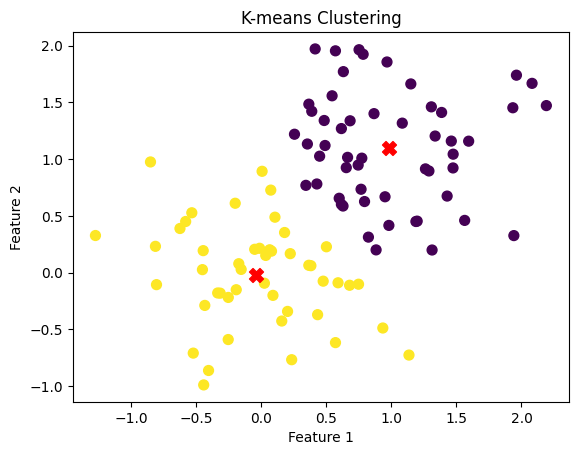

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# 生成模拟数据
np.random.seed(0)
X = np.concatenate([np.random.normal(0, 0.5, size=(50, 2)),
                   np.random.normal(1, 0.5, size=(50, 2))])

# 应用 K-means 算法
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

# 获取聚类中心和聚类标签
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# 可视化聚类结果
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, marker='X')  # 聚类中心
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()